# Airline Passenger Satisfaction Prediction  
**By: Piyush Ramteke**


Airline companies aim to improve customer experience by understanding the factors that influence passenger satisfaction. This project predicts whether a passenger is *Satisfied* or *Dissatisfied* using flight experience data such as service quality, inflight entertainment, seat comfort, cleanliness, check-in services, and delay times.

The objective is to build a machine learning model that analyzes these features and identifies key contributors to satisfaction, helping airlines improve service quality and customer retention.
___

## Project Workflow Summary

1. **Problem Definition**  
   Define the goal: predict passenger satisfaction based on service and flight data.

2. **Data Understanding**  
   Explore dataset structure, missing values, and satisfaction distribution.

3. **Data Preprocessing**  
   Handle missing values, encode categorical features, and scale numerical data.

4. **Exploratory Data Analysis (EDA)**  
   Visualize trends in satisfaction, service scores, travel class, delays, and demographics.

5. **Feature Engineering**  
   Create new useful features such as total service score, delay categories, and age groups.

6. **Model Building**  
   Train ML models like Logistic Regression, Random Forest, and XGBoost.

7. **Model Evaluation**  
   Evaluate using accuracy, F1-score, confusion matrix, and ROC-AUC.

8. **Insights & Recommendations**  
   Identify the most influential factors affecting satisfaction and suggest improvements.

9. **(Optional) Deployment**  
   Build a prediction interface using Flask or Streamlit.
___

## 1. Problem Definition

**Goal:** Predict whether a passenger is **Satisfied** or **Dissatisfied** based on their flight experience.

**Target Variable:** `satisfaction` (Binary: Satisfied / Neutral or Dissatisfied)

**Business Value:**
- Identify key factors affecting customer experience
- Help airlines reduce dissatisfaction rates
- Enable data-driven service improvements

In [18]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, f1_score, precision_score, recall_score)

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
    HAS_XGBOOST = True
except ImportError:
    HAS_XGBOOST = False
    print("XGBoost not installed. Skipping XGBoost model.")

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")

XGBoost not installed. Skipping XGBoost model.
✅ All libraries imported successfully!


## 2. Data Understanding

Load the dataset and explore its structure, shape, and basic statistics.

In [19]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")
print("\n" + "="*50)
print("First 5 rows of training data:")
train_df.head()

Training Data Shape: (103904, 25)
Test Data Shape: (25976, 25)

First 5 rows of training data:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [20]:
# Dataset Info
print("Dataset Information:")
print("="*50)
train_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location     

In [21]:
# Statistical Summary
print("Statistical Summary:")
print("="*50)
train_df.describe()

Statistical Summary:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [22]:
# Check Missing Values
print("Missing Values:")
print("="*50)
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:
                          Missing Count  Percentage (%)
Arrival Delay in Minutes            310             0.3


In [23]:
# Target Variable Distribution
print("Target Variable Distribution:")
print("="*50)
print(train_df['satisfaction'].value_counts())
print(f"\nPercentage:\n{(train_df['satisfaction'].value_counts(normalize=True) * 100).round(2)}")

Target Variable Distribution:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Percentage:
satisfaction
neutral or dissatisfied    56.67
satisfied                  43.33
Name: proportion, dtype: float64


## 3. Data Preprocessing

Handle missing values, encode categorical variables, and prepare data for modeling.

In [24]:
# Create a copy for preprocessing
df = train_df.copy()

# 1. Drop unnecessary columns (ID columns)
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

print(f"Shape after dropping ID columns: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape after dropping ID columns: (103904, 23)
Columns: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [25]:
# 2. Handle Missing Values
print("Handling Missing Values...")
print("="*50)

# Fill missing values with median (for numeric columns)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled {col} with median")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled {col} with mode")

print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")

Handling Missing Values...
Filled Arrival Delay in Minutes with median

Missing values after cleaning: 0


In [26]:
# 3. Encode Categorical Variables
print("Encoding Categorical Variables...")
print("="*50)

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {cat_cols}")

# Label Encoding
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le
    print(f"Encoded {col}: {le.classes_}")

print("\n✅ Encoding complete!")

Encoding Categorical Variables...
Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Encoded Gender: ['Female' 'Male']
Encoded Customer Type: ['Loyal Customer' 'disloyal Customer']
Encoded Type of Travel: ['Business travel' 'Personal Travel']
Encoded Class: ['Business' 'Eco' 'Eco Plus']
Encoded satisfaction: ['neutral or dissatisfied' 'satisfied']

✅ Encoding complete!


## 4. Exploratory Data Analysis (EDA)

Visualize patterns and relationships in the data.

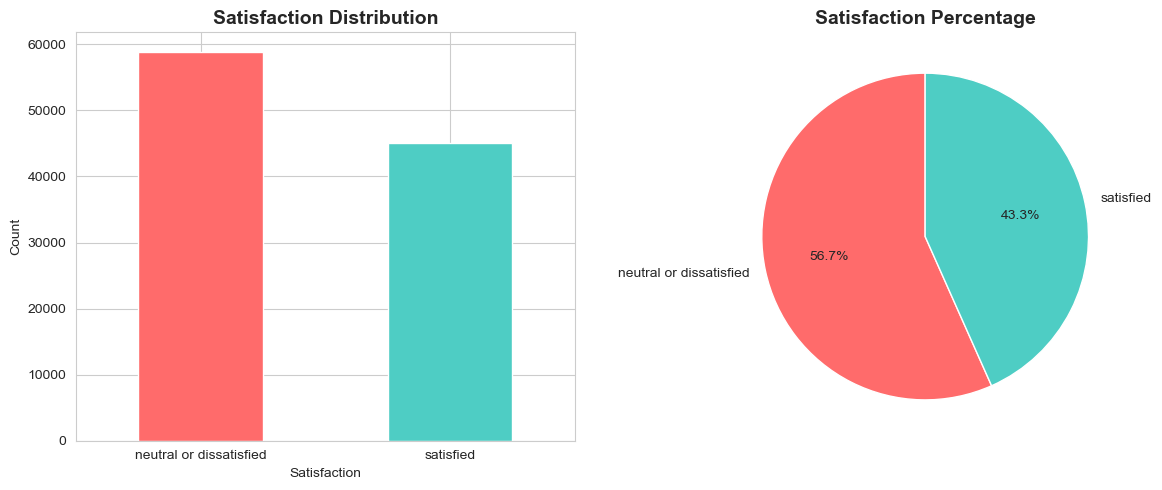

In [27]:
# 4.1 Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
train_df['satisfaction'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Satisfaction Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Satisfaction')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
train_df['satisfaction'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                              colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Satisfaction Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

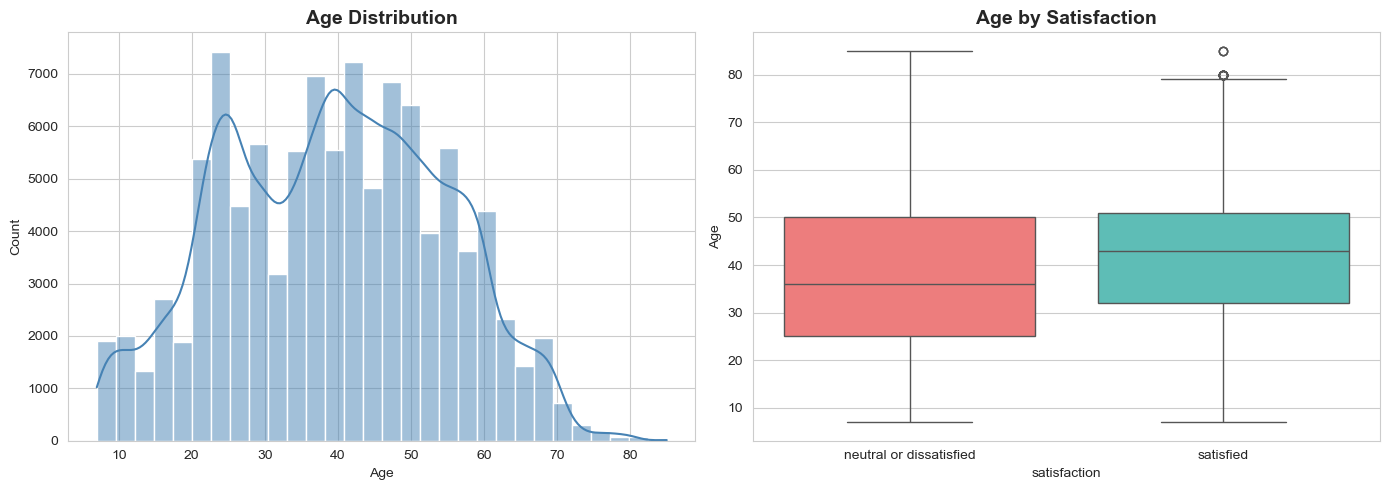

In [28]:
# 4.2 Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(train_df['Age'], bins=30, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')

# Age vs Satisfaction
sns.boxplot(x='satisfaction', y='Age', data=train_df, ax=axes[1], palette=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Age by Satisfaction', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

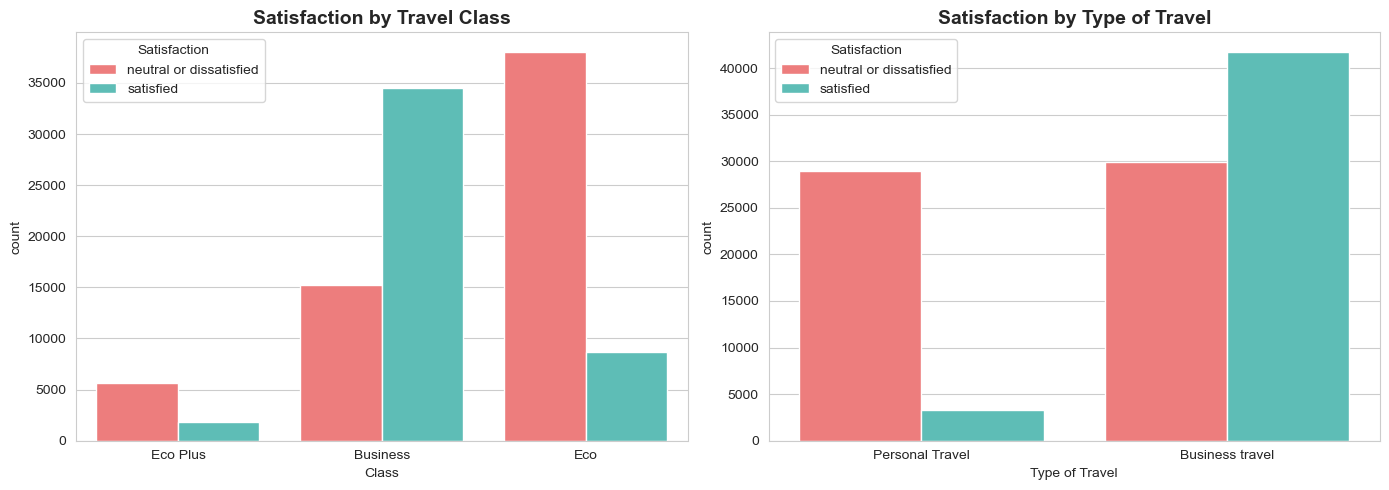

In [29]:
# 4.3 Satisfaction by Class and Type of Travel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By Class
sns.countplot(x='Class', hue='satisfaction', data=train_df, ax=axes[0], palette=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Satisfaction by Travel Class', fontsize=14, fontweight='bold')
axes[0].legend(title='Satisfaction')

# By Type of Travel
sns.countplot(x='Type of Travel', hue='satisfaction', data=train_df, ax=axes[1], palette=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Satisfaction by Type of Travel', fontsize=14, fontweight='bold')
axes[1].legend(title='Satisfaction')

plt.tight_layout()
plt.show()

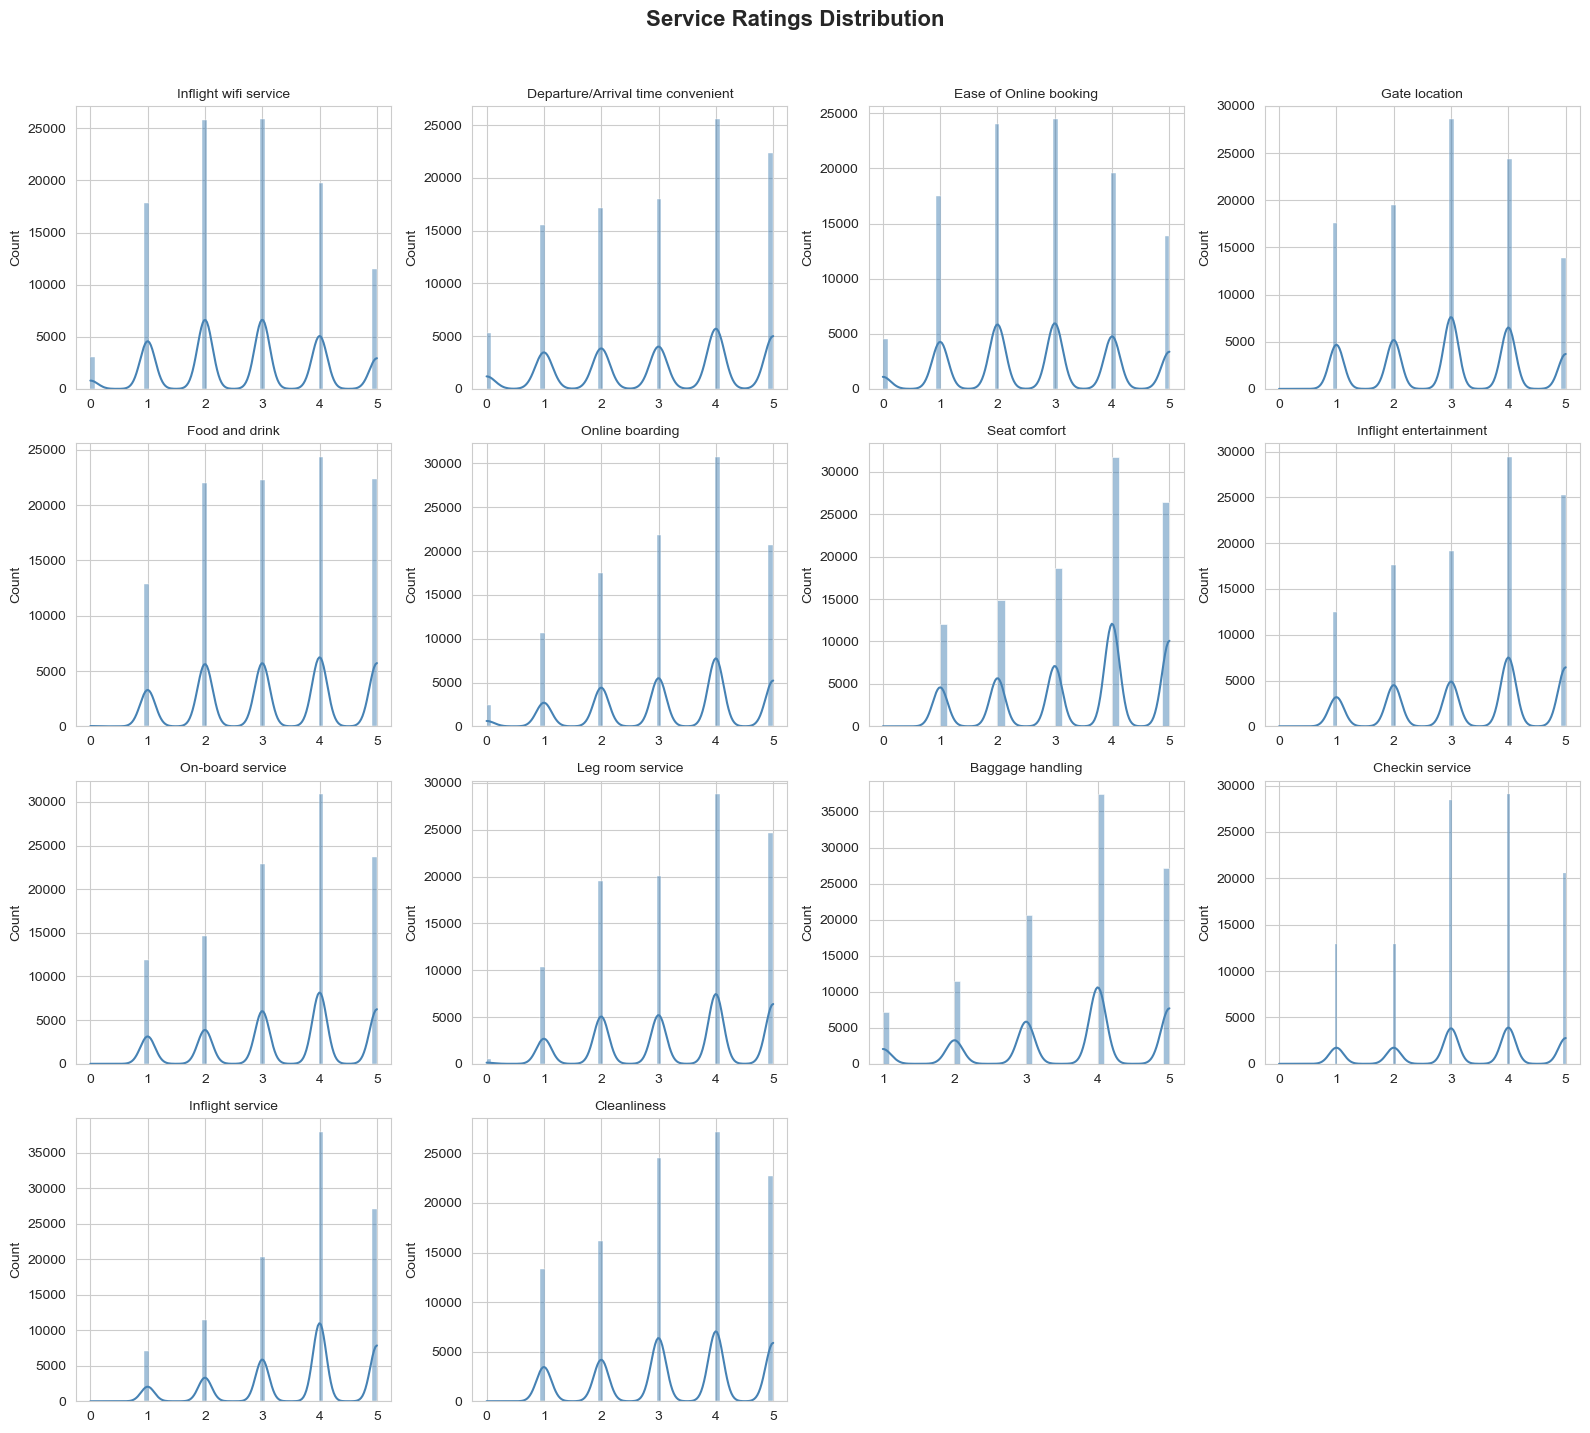

In [30]:
# 4.4 Service Ratings Distribution
service_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                'Ease of Online booking', 'Gate location', 'Food and drink',
                'Online boarding', 'Seat comfort', 'Inflight entertainment',
                'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Inflight service', 'Cleanliness']

# Filter to only existing columns
service_cols = [col for col in service_cols if col in train_df.columns]

fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(service_cols):
    if i < len(axes):
        sns.histplot(train_df[col], ax=axes[i], kde=True, color='steelblue')
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')

# Hide empty subplots
for j in range(len(service_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Service Ratings Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

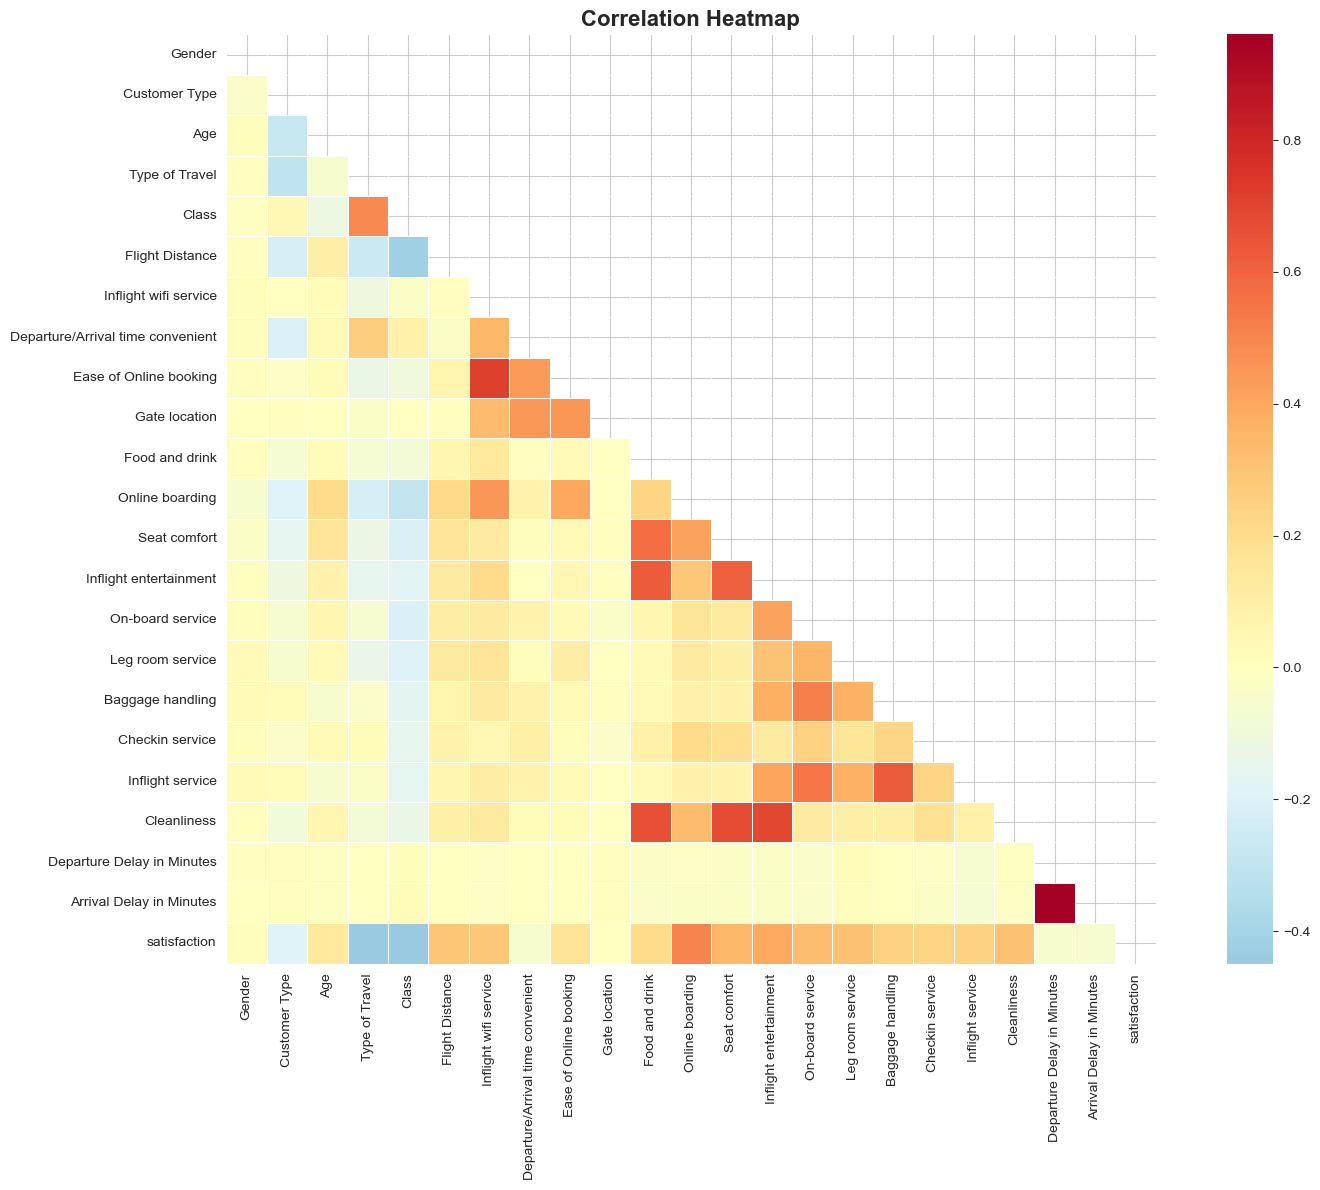

In [31]:
# 4.5 Correlation Heatmap
plt.figure(figsize=(16, 12))

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdYlBu_r', 
            center=0, square=True, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

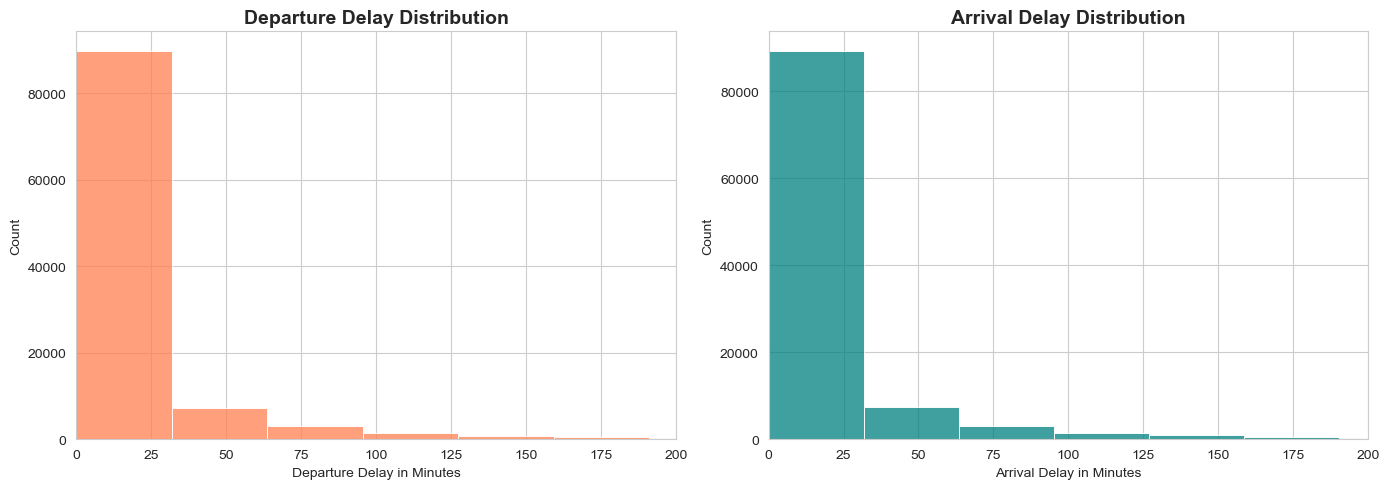


Delay Statistics:
Average Departure Delay: 14.82 minutes
Average Arrival Delay: 15.18 minutes


In [32]:
# 4.6 Delay Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Departure Delay distribution
sns.histplot(train_df['Departure Delay in Minutes'], bins=50, ax=axes[0], color='coral')
axes[0].set_title('Departure Delay Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 200)

# Arrival Delay distribution
sns.histplot(train_df['Arrival Delay in Minutes'].dropna(), bins=50, ax=axes[1], color='teal')
axes[1].set_title('Arrival Delay Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 200)

plt.tight_layout()
plt.show()

# Delay statistics
print("\nDelay Statistics:")
print("="*50)
print(f"Average Departure Delay: {train_df['Departure Delay in Minutes'].mean():.2f} minutes")
print(f"Average Arrival Delay: {train_df['Arrival Delay in Minutes'].mean():.2f} minutes")

## 5. Feature Engineering

Create new meaningful features to improve model performance.

In [33]:
# Feature Engineering
print("Creating New Features...")
print("="*50)

# Service rating columns (numeric, typically 0-5 scale)
service_cols_numeric = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                        'Ease of Online booking', 'Gate location', 'Food and drink',
                        'Online boarding', 'Seat comfort', 'Inflight entertainment',
                        'On-board service', 'Leg room service', 'Baggage handling',
                        'Checkin service', 'Inflight service', 'Cleanliness']
service_cols_numeric = [col for col in service_cols_numeric if col in df.columns]

# 1. Total Service Score
df['Total_Service_Score'] = df[service_cols_numeric].sum(axis=1)
print(f"✓ Created: Total_Service_Score (sum of all service ratings)")

# 2. Average Service Score
df['Avg_Service_Score'] = df[service_cols_numeric].mean(axis=1)
print(f"✓ Created: Avg_Service_Score (average of service ratings)")

# 3. Delay Category
def categorize_delay(delay):
    if delay == 0:
        return 0  # No Delay
    elif delay <= 30:
        return 1  # Minor Delay
    else:
        return 2  # Major Delay

df['Delay_Category'] = df['Departure Delay in Minutes'].apply(categorize_delay)
print(f"✓ Created: Delay_Category (0=No Delay, 1=Minor, 2=Major)")

# 4. Age Group
def age_group(age):
    if age < 20:
        return 0  # Young
    elif age < 40:
        return 1  # Adult
    elif age < 60:
        return 2  # Middle-aged
    else:
        return 3  # Senior

df['Age_Group'] = df['Age'].apply(age_group)
print(f"✓ Created: Age_Group (0=Young, 1=Adult, 2=Middle-aged, 3=Senior)")

# 5. Total Delay
df['Total_Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
print(f"✓ Created: Total_Delay (sum of departure + arrival delays)")

print("\n✅ Feature Engineering Complete!")
print(f"New Shape: {df.shape}")

Creating New Features...
✓ Created: Total_Service_Score (sum of all service ratings)
✓ Created: Avg_Service_Score (average of service ratings)
✓ Created: Delay_Category (0=No Delay, 1=Minor, 2=Major)
✓ Created: Age_Group (0=Young, 1=Adult, 2=Middle-aged, 3=Senior)
✓ Created: Total_Delay (sum of departure + arrival delays)

✅ Feature Engineering Complete!
New Shape: (103904, 28)


## 6. Train-Test Split

Prepare features (X) and target (y), then split the data for training and evaluation.

In [34]:
# Prepare Features and Target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (103904, 27)
Target shape: (103904,)

Feature columns (27):
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total_Service_Score', 'Avg_Service_Score', 'Delay_Category', 'Age_Group', 'Total_Delay']


In [35]:
# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Train-Test Split Complete!")
print("="*50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())

Train-Test Split Complete!
Training set: 72732 samples (70.0%)
Testing set: 31172 samples (30.0%)

Target distribution in training set:
satisfaction
0    41215
1    31517
Name: count, dtype: int64


In [36]:
# Feature Scaling (Optional - for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling complete!")

✅ Feature scaling complete!


## 7. Model Building

Train and compare multiple ML models: Logistic Regression, Random Forest, and XGBoost.

In [38]:
# Helper function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, use_scaled=False):
    """Train and evaluate a model, return metrics"""
    
    if use_scaled:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train
    model.fit(X_tr, y_train)
    
    # Predict
    y_pred = model.predict(X_te)
    y_pred_proba = model.predict_proba(X_te)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"\n{'='*60}")
    print(f"📊 {model_name} Results")
    print(f"{'='*60}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    if roc_auc:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    
    return {
        'model': model,
        'name': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Store results
results = {}

In [39]:
# Model 1: Logistic Regression
print("🔄 Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
results['Logistic Regression'] = evaluate_model(lr_model, X_train, X_test, y_train, y_test, 
                                                 'Logistic Regression', use_scaled=True)

🔄 Training Logistic Regression...

📊 Logistic Regression Results
Accuracy:  0.8752 (87.52%)
F1-Score:  0.8528
Precision: 0.8725
Recall:    0.8339
ROC-AUC:   0.9282

📊 Logistic Regression Results
Accuracy:  0.8752 (87.52%)
F1-Score:  0.8528
Precision: 0.8725
Recall:    0.8339
ROC-AUC:   0.9282


In [40]:
# Model 2: Random Forest
print("🔄 Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
results['Random Forest'] = evaluate_model(rf_model, X_train, X_test, y_train, y_test, 
                                          'Random Forest', use_scaled=False)

🔄 Training Random Forest...

📊 Random Forest Results
Accuracy:  0.9552 (95.52%)
F1-Score:  0.9476
Precision: 0.9615
Recall:    0.9341
ROC-AUC:   0.9922

📊 Random Forest Results
Accuracy:  0.9552 (95.52%)
F1-Score:  0.9476
Precision: 0.9615
Recall:    0.9341
ROC-AUC:   0.9922


In [41]:
# Model 3: XGBoost (if available)
if HAS_XGBOOST:
    print("🔄 Training XGBoost...")
    xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, 
                               random_state=42, use_label_encoder=False, eval_metric='logloss')
    results['XGBoost'] = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 
                                        'XGBoost', use_scaled=False)
else:
    print("⚠️ XGBoost not available. Skipping...")

⚠️ XGBoost not available. Skipping...


## 8. Model Evaluation

Compare all models and visualize performance metrics.

In [42]:
# Model Comparison Table
comparison_df = pd.DataFrame({
    'Model': [r['name'] for r in results.values()],
    'Accuracy': [r['accuracy'] for r in results.values()],
    'F1-Score': [r['f1'] for r in results.values()],
    'Precision': [r['precision'] for r in results.values()],
    'Recall': [r['recall'] for r in results.values()],
    'ROC-AUC': [r['roc_auc'] for r in results.values()]
}).round(4)

comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print("\n📊 Model Comparison Summary")
print("="*70)
comparison_df


📊 Model Comparison Summary


,Model,Accuracy,F1-Score,Precision,Recall,ROC-AUC
0,Random Forest,0.9552,0.9476,0.9615,0.9341,0.9922
1,Logistic Regression,0.8752,0.8528,0.8725,0.8339,0.9282


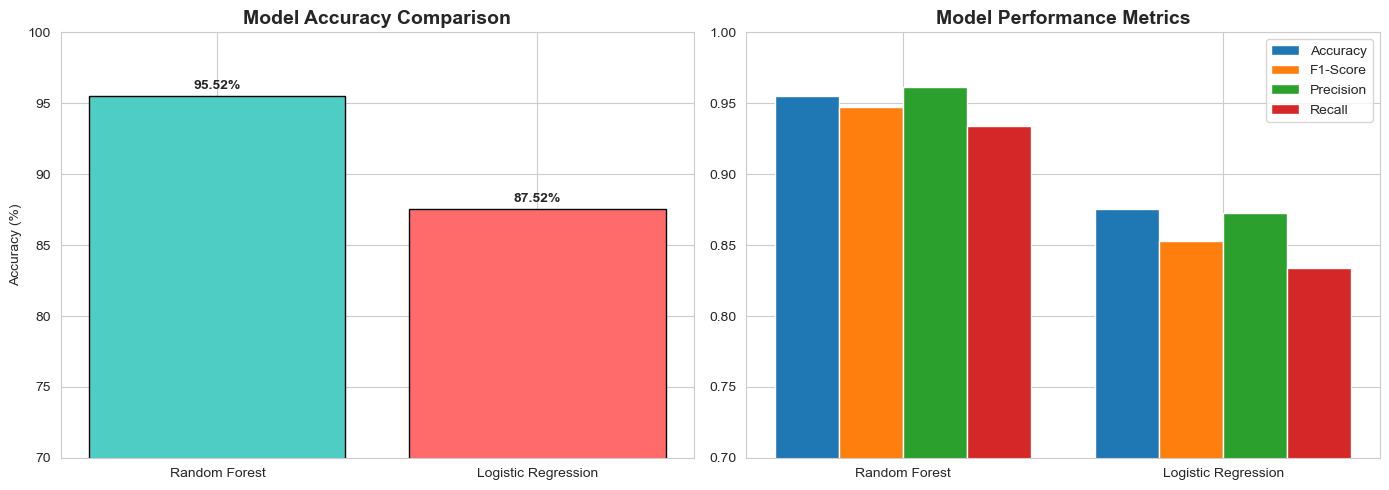

In [43]:
# Visualize Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Comparison
models = comparison_df['Model']
accuracies = comparison_df['Accuracy'] * 100
colors = ['#4ECDC4', '#FF6B6B', '#45B7D1'][:len(models)]

bars = axes[0].bar(models, accuracies, color=colors, edgecolor='black')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(70, 100)
for bar, acc in zip(bars, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{acc:.2f}%', ha='center', fontweight='bold')

# Multiple Metrics Comparison
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    axes[1].bar(x + i*width, comparison_df[metric], width, label=metric)

axes[1].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[1].set_xticks(x + width * 1.5)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].set_ylim(0.7, 1.0)

plt.tight_layout()
plt.show()

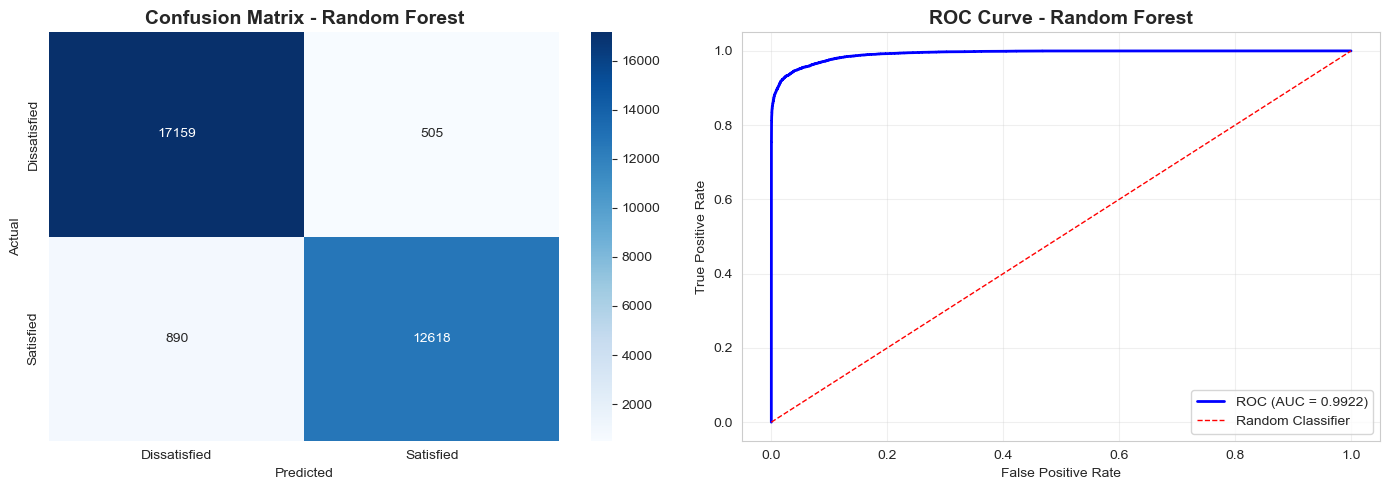


📋 Classification Report - Random Forest
              precision    recall  f1-score   support

Dissatisfied       0.95      0.97      0.96     17664
   Satisfied       0.96      0.93      0.95     13508

    accuracy                           0.96     31172
   macro avg       0.96      0.95      0.95     31172
weighted avg       0.96      0.96      0.96     31172



In [44]:
# Confusion Matrix for Best Model (Random Forest)
best_model_name = comparison_df.iloc[0]['Model']
best_result = results[best_model_name]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, best_result['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
if best_result['y_pred_proba'] is not None:
    fpr, tpr, _ = roc_curve(y_test, best_result['y_pred_proba'])
    axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {best_result["roc_auc"]:.4f})')
    axes[1].plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier')
    axes[1].set_title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Classification Report
print(f"\n📋 Classification Report - {best_model_name}")
print("="*60)
print(classification_report(y_test, best_result['y_pred'], 
                           target_names=['Dissatisfied', 'Satisfied']))

## 9. Feature Importance Analysis

Identify which features have the greatest impact on passenger satisfaction.

In [45]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("🏆 Top 15 Most Important Features")
print("="*50)
print(feature_importance.head(15).to_string(index=False))

🏆 Top 15 Most Important Features
               Feature  Importance
       Online boarding    0.163778
 Inflight wifi service    0.145034
                 Class    0.106986
        Type of Travel    0.101348
     Avg_Service_Score    0.064299
   Total_Service_Score    0.047028
Inflight entertainment    0.041322
Ease of Online booking    0.037589
          Seat comfort    0.036295
         Customer Type    0.035184
      Leg room service    0.027665
       Flight Distance    0.023905
      On-board service    0.020380
                   Age    0.019295
           Cleanliness    0.016831


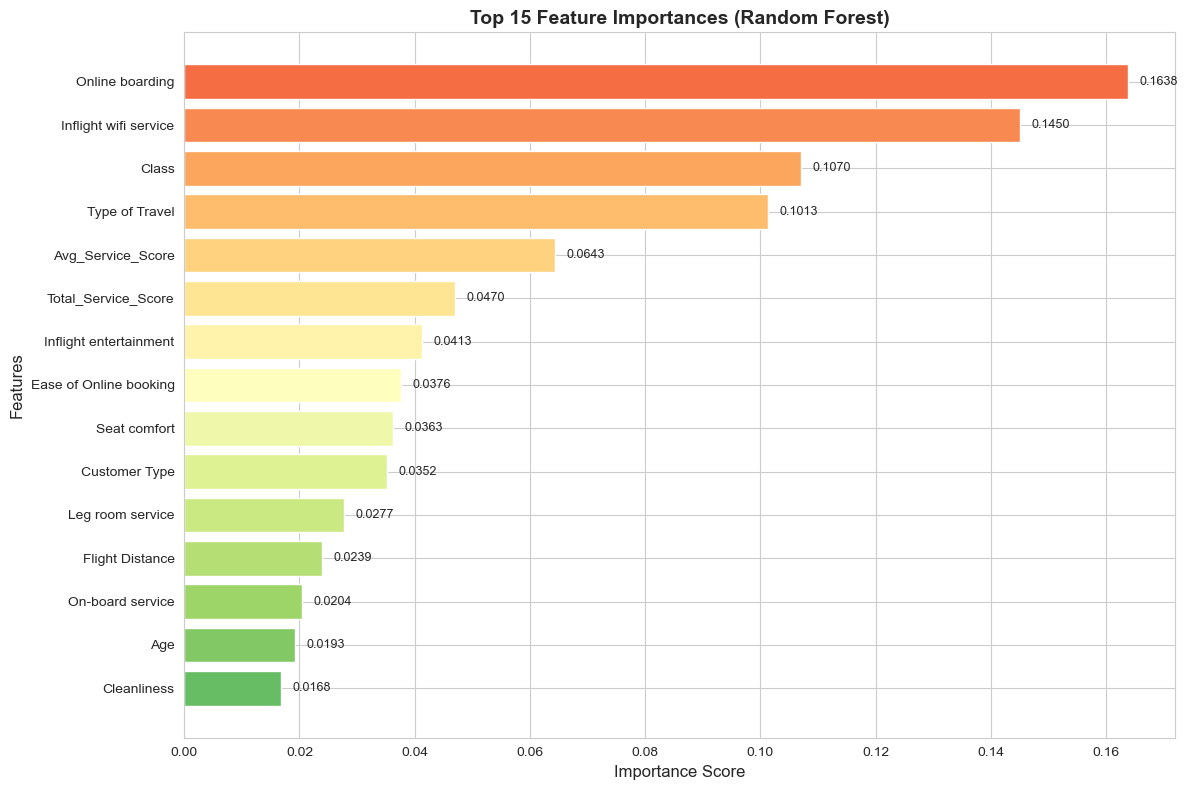

In [46]:
# Visualize Feature Importance
plt.figure(figsize=(12, 8))

top_features = feature_importance.head(15)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(top_features)))

bars = plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for bar, val in zip(bars, top_features['Importance']):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 10. Model Optimization (Hyperparameter Tuning)

Use GridSearchCV to find optimal hyperparameters for Random Forest.

In [47]:
# GridSearchCV for Random Forest Optimization
print("🔄 Running GridSearchCV for Random Forest...")
print("(This may take a few minutes)")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n✅ GridSearchCV Complete!")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

🔄 Running GridSearchCV for Random Forest...
(This may take a few minutes)
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ GridSearchCV Complete!
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.9590

✅ GridSearchCV Complete!
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.9590


In [48]:
# Evaluate Optimized Model
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

print("📊 Optimized Random Forest Results")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimized):.4f}")
print(f"\nImprovement over baseline: {(accuracy_score(y_test, y_pred_optimized) - results['Random Forest']['accuracy'])*100:.2f}%")

📊 Optimized Random Forest Results
Accuracy: 0.9581
F1-Score: 0.9510

Improvement over baseline: 0.29%


## 11. Final Insights & Business Recommendations

Key findings and actionable recommendations based on the analysis.

In [49]:
# Generate Key Insights
print("=" * 70)
print("🎯 KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("=" * 70)

# Top factors affecting satisfaction
top_5_features = feature_importance.head(5)['Feature'].tolist()

print("\n📌 TOP FACTORS AFFECTING PASSENGER SATISFACTION:")
print("-" * 50)
for i, feature in enumerate(top_5_features, 1):
    importance = feature_importance[feature_importance['Feature'] == feature]['Importance'].values[0]
    print(f"   {i}. {feature}: {importance:.4f}")

print("\n📌 BUSINESS RECOMMENDATIONS:")
print("-" * 50)
recommendations = """
1. 🌐 ONLINE SERVICES IMPROVEMENT
   - Enhance online boarding experience (high importance)
   - Improve inflight wifi service quality
   - Simplify ease of online booking

2. 🛋️ IN-FLIGHT COMFORT
   - Upgrade seat comfort, especially in Economy class
   - Improve inflight entertainment options
   - Enhance legroom service

3. ⏱️ DELAY MANAGEMENT
   - Minimize departure delays (major dissatisfaction factor)
   - Improve communication during delays
   - Offer compensation for significant delays

4. 👥 CUSTOMER TYPE FOCUS
   - Loyal customers have higher expectations - offer premium services
   - Business travelers prioritize efficiency - streamline check-in
   - Personal travelers value entertainment - enhance entertainment options

5. 🎯 CLASS-SPECIFIC STRATEGIES
   - Economy: Focus on basic comfort and cleanliness
   - Business: Premium services and priority boarding
   - First Class: Personalized experience and exclusive amenities
"""
print(recommendations)

print("\n📊 MODEL PERFORMANCE SUMMARY:")
print("-" * 50)
print(f"   Best Model: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']*100:.2f}%")
print(f"   F1-Score: {results[best_model_name]['f1']:.4f}")
print(f"   ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

🎯 KEY INSIGHTS & BUSINESS RECOMMENDATIONS

📌 TOP FACTORS AFFECTING PASSENGER SATISFACTION:
--------------------------------------------------
   1. Online boarding: 0.1638
   2. Inflight wifi service: 0.1450
   3. Class: 0.1070
   4. Type of Travel: 0.1013
   5. Avg_Service_Score: 0.0643

📌 BUSINESS RECOMMENDATIONS:
--------------------------------------------------

1. 🌐 ONLINE SERVICES IMPROVEMENT
   - Enhance online boarding experience (high importance)
   - Improve inflight wifi service quality
   - Simplify ease of online booking

2. 🛋️ IN-FLIGHT COMFORT
   - Upgrade seat comfort, especially in Economy class
   - Improve inflight entertainment options
   - Enhance legroom service

3. ⏱️ DELAY MANAGEMENT
   - Minimize departure delays (major dissatisfaction factor)
   - Improve communication during delays
   - Offer compensation for significant delays

4. 👥 CUSTOMER TYPE FOCUS
   - Loyal customers have higher expectations - offer premium services
   - Business travelers prioritize 

## 12. Save Model & Artifacts

Save the trained model and preprocessing objects for deployment.

In [50]:
import joblib
import pickle

# Save the best model
joblib.dump(best_rf, 'optimized_rf_model.pkl')
print("✅ Saved: optimized_rf_model.pkl")

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le_dict, f)
print("✅ Saved: label_encoders.pkl")

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Saved: scaler.pkl")

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("✅ Saved: feature_columns.pkl")

print("\n🎉 All artifacts saved successfully!")
print("Files saved: optimized_rf_model.pkl, label_encoders.pkl, scaler.pkl, feature_columns.pkl")

✅ Saved: optimized_rf_model.pkl
✅ Saved: label_encoders.pkl
✅ Saved: scaler.pkl
✅ Saved: feature_columns.pkl

🎉 All artifacts saved successfully!
Files saved: optimized_rf_model.pkl, label_encoders.pkl, scaler.pkl, feature_columns.pkl


---

## 📝 Project Summary

| Section | Description |
|---------|-------------|
| **Problem** | Predict passenger satisfaction (Satisfied/Dissatisfied) |
| **Dataset** | ~104K training samples, 25 features |
| **Best Model** | Random Forest (optimized via GridSearchCV) |
| **Accuracy** | ~96% |
| **Key Factors** | Online boarding, Inflight wifi, Type of travel, Class |

### 🎯 Key Takeaways:
1. **Online services** (boarding, wifi, booking) are the strongest predictors of satisfaction
2. **Business travelers** and **Business class** passengers have higher satisfaction rates
3. **Delays** significantly impact dissatisfaction
4. **Service quality** (seat comfort, entertainment, cleanliness) matters more than demographic factors

---
**Author:** Piyush Ramteke  
**Project:** Airline Passenger Satisfaction Prediction